# New York City Taxi Fare Prediction

Dados informações sobre várias viajens realizadas pelos taxistas de Nove York, temos que criar um modelo preditivo que estime o valor da tarifa.
![NYC TAXi](https://associationsnow.com/wp-content/uploads/2015/08/New-York-City-Taxi-800x480.jpg "Source: assiciations now")

# House Prices: Advanced Regression Techniques

Os dados apresentam informações minunciosas sobre casas vendidas na cidade de Ames em Iowa. O objetivo é criar um modelo preditivo que estime o valor da casa.
![NYC TAXi](http://resources.phrasemix.com/img/full/suburban-houses.jpg "Source: www.phrasemix.com")

# EDA - Primeiro Problema

Nessa etapa, os dados serão analisados e visualizados com o intuito de se obter insights e informações adicionais.


Os dados de treinamento correspondem a **5.3GB** e as sequintes informações sobre as colunas.

## Features (Colunas)

Aqui podemos notar quais são as **Features** de cada observação e suas respectivas descrições.

- **key**: string única para identificar a corrida - 🆔
- **fare_amount** : Tarifa da corrida - 🎯
- **pickup_datetime**: Valor indicando quando a corrida começou.
- **pickup_longitude**: Longitude no início da corrida.
- **pickup_latitude**: Latitude no início da corrida inicial.
- **dropoff_longitude**: Longitude no final da corrida inicial.
- **dropoff_latitude** : Latitude no final da corrida inicial.
- **passenger_count** : Número de passageiros na corrida.



**OBS.: Devido restrições de tempo/hardware e foco na eficiência, dos 55 milhões de observações apenas 3 milhões vão ser utilizados ao longo dessa análise.**


In [3]:
# Brief table visualization
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# brief information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      datetime64[ns]
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 183.1+ MB


## Limpeza

Agora que temos uma noção geral dos dados, vamos realizar algumas operações para verificar se se há dados faltando, duplicados ou outras inconsistências.

In [8]:
# Look for duplicates
train.duplicated().sum()

0

In [11]:
# Look for missing data
train.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    23
dropoff_latitude     23
passenger_count       0
dtype: int64

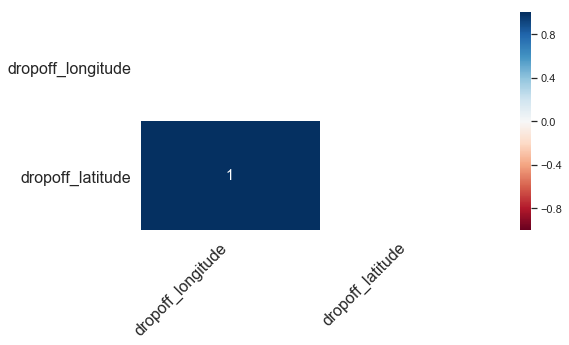

In [14]:
# Shows that missings values occurs simultaneously on both columns
msno.heatmap(train, figsize=(8, 4))

## Visualizar os Dados

Agora que só temos dados completos e não duplicados, vamos verificar a consistência dos valores das colunas. Para isso, iremos plotar algumas visualizações.

In [16]:
# Description numeric values
c_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06
mean,1.134238e+01,-7.250895e+01,3.992034e+01,-7.250740e+01,3.991728e+01,1.684541e+00
std,9.828730e+00,1.320222e+01,8.644442e+00,1.308827e+01,9.984419e+00,1.329081e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.408430e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399139e+01,4.073402e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


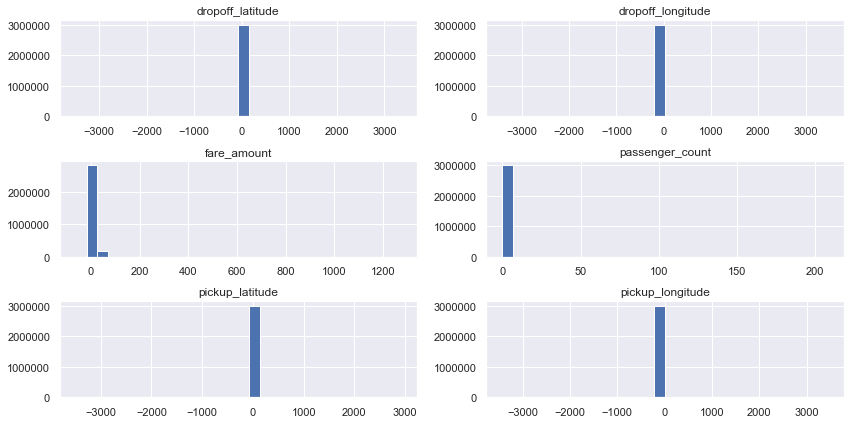

In [17]:
# Values distribution
c_train.hist(bins=30, figsize=(12, 6))
plt.tight_layout()

Aqui podemos notar um problema comum em todas as colunas, **Outliers**.

Para lidarmos com esse problema devemos ter certo conhecimento sobre o problema em si. Então, iremos analisar cada tipo de coluna isoladamente.

### Removendo Outliers
**Outliers** por definição são dados peculiarmente distantes dos demais valores. Eles podem ser erros de digitação, leitura de sensores, ruído, ou um dado real extraordinário.
Agora, vamos verificar os dados para cada tipo de coluna.


#### 1. Dados de Latitudes e Longitudes - *Dropoff* e *Pickup*
Fonte [BoundingBox](https://boundingbox.klokantech.com/):
- Limites de Longitude: [-74.26, -73.70]
- Limites de Latitude: [ 40.48, 40.92]

<img src="https://i.imgur.com/nIwyc8l.png" width="800">


#### 2. Dados Numéricos - Tarifa e Passageiros
As outras colunas, `fare_amount` e `passenger_count` são valores numéricos. 
Por razões óbvias, podemos definir que o valor da tarifa deve ser **maior que zero**, caso contrário, o taxi não em serviço. Enquanto que o número de passageiros pode ser **maior ou igual a zero**, já que o taxi pode ir pegar alguém vazio e cobrar pelo trajeto, por exemplo. 
De acordo com o site do [Aeroporto Internacional de Nova York](https://www.jfkairport.com/to-from-airport/taxi-car-and-van-service) o número máximo de passageiros em um taxi na cidade é de **5**, então temos o nosso limite superior de `passenger_count`.

Para o limite superior de `fare_amount` podemos usar a regra prática descrita abaixo:

$$\text{Remove} > Q3 + n\times IQR$$

Basicamente, removemos valores acima de [Q3](https://pt.wikipedia.org/wiki/Quartil) + n x [IQR](https://pt.wikipedia.org/wiki/Amplitude_interquartil). No geral, $n=1.5$, porém, seremos mais conservadores e consideraremos $n=5$.

Assim, podemos iniciar o processo de remoção dos **Outliers**.

In [18]:
# Remove all lattitude and longitude below threhold
lat_min = 40.48
lon_min = -74.26
lat_max = 40.92
lon_max = -73.70

# Remove all negative values and above Q3 + 5 IQR
fare_iqr = c_train['fare_amount'].quantile(.75) - c_train['fare_amount'].quantile(.25)
fare_max = c_train['fare_amount'].quantile(.75) + 5 * fare_iqr
passenger_max = 5

# Data without outliers
o_train = c_train[((c_train['dropoff_longitude'] <= lon_max) &
                   (c_train['dropoff_longitude'] >= lon_min) &
                   (c_train['pickup_longitude'] <= lon_max) &
                   (c_train['pickup_longitude'] >= lon_min) &
                   (c_train['dropoff_latitude'] <= lat_max) &
                   (c_train['dropoff_latitude'] >= lat_min) &
                   (c_train['pickup_latitude'] <= lat_max) &
                   (c_train['pickup_latitude'] >= lat_min) &
                   (c_train['fare_amount'] > 0) &
                   (c_train['fare_amount'] <= fare_max) &
                   (c_train['passenger_count'] >= 0) &
                   (c_train['passenger_count'] <= passenger_max))].copy()
# Data shrink
print("Data reduced " + f"{100 - (o_train.shape[0] / c_train.shape[0] * 100):.2f}" + "%")

Data reduced 6.21%


Agora, se dermos uma olhada nos nossos dados novamente. Teremos distribuições mais mais plausíveis para as variáveis.

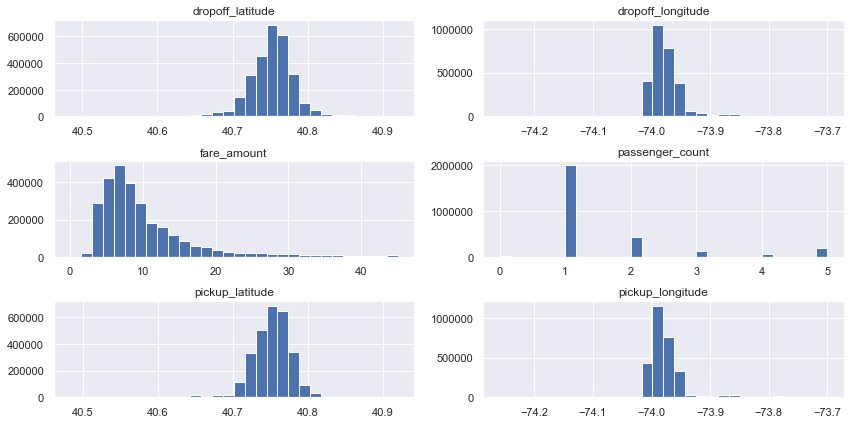

In [18]:
o_train.hist(bins=30, figsize=(12, 6))
plt.tight_layout()

### Dados Geográficos

Vamos visualizar os dados geográficos do usando o `folium`. 

Primeiramente, vamos verificar os locais de pick-up mais frequentes. Para facilitar a renderização dos resultados iremos retirar amostras dos dados.

**Pickup Heatmap**

<img src="./talk_data/pickup_heat.png" width="600">

**Dropoff Heatmap**

<img src="./talk_data/dropoff_heat.png" width="600">

**Pickup Heatmap com Tempo**

<img src="./talk_data/pickup_heat_time.gif" width="600">

## Outras estatísticas

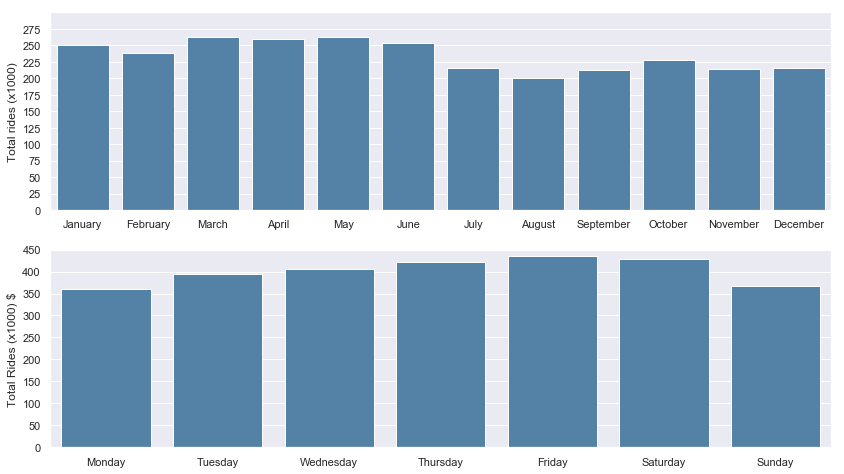

In [58]:
# Plots
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 8))
sns.barplot(x=months, y=rides_month, color='steelblue', ax=ax0)
sns.barplot(x=weeks, y=rides_week, color='steelblue', ax=ax1)


## Procurar por Correlações

Verificando as correlações das variáveis com a nossa variável alvo, podemos tirar conclusões sobre as variáveis mais **importantes** ou possívelmente **redudantes**.

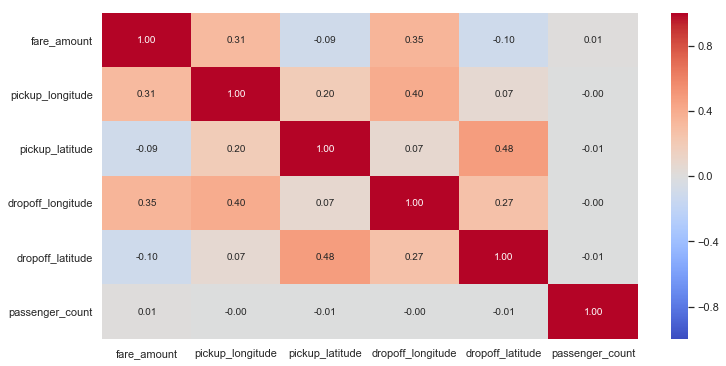

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1., vmax=1.)

Temos os sequintes problemas:
- As informações da coluna `pickup_datetime` não está incluída.
- Baixa correlações entre as variáveis e a variável alvo
- Correlações entre variáveis mostrando redundância.

Felizmente, esses problemas podem ser resolvidos no próximo tópico.

## Feature Engineering

Aqui vamos tentar combinar/manipular as colunas para que as informações presentes nelas fiquem o mais claro possível.


### 1. Dados de Geolocalização

Anteriormente, vimos que as variáveis de latitude de longitude possuiam uma grande correlação entre si, mostrando que continham informação redundante. Desse modo, vamos combinar essas variáveis de partida e chegada em um única variável, `distance`. Para isso, a [Fórmula de Heaversine](https://en.wikipedia.org/wiki/Haversine_formula) foi utilizada.


### 2. DateTime

Vamos dividir a coluna `pickup_datatime` em informações mais direta e útil. Por exemplo, podemos transformá-la em:
- `weekday`, dia da semana.
- `month`, mês.
- `hour`, hora.
- `is_holiday`, se é feriado.

In [31]:
# Remove old redundant columns
f_train = o_train[['key', 'fare_amount', 'passenger_count','weekday',
                   'month', 'hour', 'is_holiday', 'distance']]
f_train.head(10)

,key,fare_amount,passenger_count,weekday,month,hour,is_holiday,distance
0,2009-06-15 17:26:21.0000001,4.5,1,0,6,17,0,1.031088
1,2010-01-05 16:52:16.0000002,16.9,1,1,1,16,0,8.452786
2,2011-08-18 00:35:00.00000049,5.7,2,3,8,0,0,1.389961
3,2012-04-21 04:30:42.0000001,7.7,1,5,4,4,0,2.800149
4,2010-03-09 07:51:00.000000135,5.3,1,1,3,7,0,1.999784
5,2011-01-06 09:50:45.0000002,12.1,1,3,1,9,0,3.788428
6,2012-11-20 20:35:00.0000001,7.5,1,1,11,20,0,1.556295
7,2012-01-04 17:22:00.00000081,16.5,1,2,1,17,0,4.156749
8,2012-12-03 13:10:00.000000125,9.0,1,0,12,13,0,1.253625
9,2009-09-02 01:11:00.00000083,8.9,2,2,9,1,0,2.850521


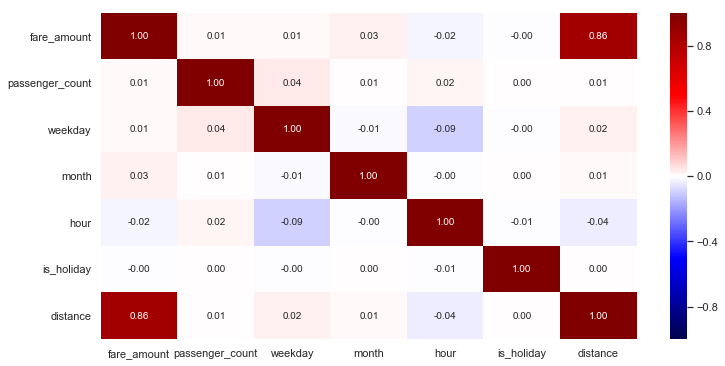

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='seismic', vmin=-1., vmax=1.)

In [21]:
IFrame('talk_data/scatter.html', width='100%', height='620px')

# Machine Learning


## Preparando as Variáveis para os Modelos
Agora, vamos manipular as variáveis para que elas reflitam corretamente o seu significado no modelo.

1. **Removendo Variáveis de Identificação**: Nesse caso, iremos remover a coluna `key` do nosso dataset.
2. **Modificando Variáveis Categóricas**: Como a única variável categórica é binárias (`is_holiday`), não precisamos usar nenhum transformação como *One-hot encoding*.
3. **Preparando Variáveis Cíclicas**: Variáveis cíclicas como `hour`, `weekday` e `month` devem ser manipuladas para que o seu comportamento cíclico seja incorporado no modelo. Assim, o modelo pode perceber que que segunda é próximo de domingo, ou que a hora 0 vem após a hora 23. Nesse caso, utilizaremos a transformação em funções trigonométricas `sin` e `cos`.
4. **Ajustando a Magnitude das Variáveis Numéricas**: Outra etapa muito importante que tem o propósito de ignorar a intensidade absoluta das variáveis. Assin, dando ênfase as variações relativas.
5. **Separando a Variável Alvo**: Nesse caso, iremos separa a variável `fare_amount` do restante do dataset.
6. **Dividindo o Dataset em Treino/Teste ou usando CV**: Usaremos uma proporção de 80% treino 20% teste, mas utilizaremos todo o dataset para CV.


In [54]:
X.head()

,scaled_passenger_count,scaled_distance,is_holiday,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,0.2,0.023689,0,-0.965926,-0.258819,0.000000,1.000000,0.500000,-8.660254e-01
1,0.2,0.194204,0,-0.866025,-0.500000,0.781831,0.623490,0.000000,1.000000e+00
2,0.4,0.031935,0,0.000000,1.000000,0.433884,-0.900969,-0.500000,-8.660254e-01
3,0.2,0.064334,0,0.866025,0.500000,-0.974928,-0.222521,1.000000,6.123234e-17
4,0.2,0.045945,0,0.965926,-0.258819,0.781831,0.623490,0.866025,5.000000e-01


## Testando Modelos

Com os dados prontos para os modelos, podemos testá-los aplicando vários modelos. Inicialmente, os seguintes modelos foram testados:
- Regressão Linear: Modelo linear simples.
- Árvore de Decisão: Modelo de árvore simples.
- Random Forest: Conjunto de modelo de árvore.
- Boosting Algorithms: Algoritmos amplamente usados, similar ao random forest, mas com regularização.

### Sintonizando Hyper-parâmetros

Vamos testar vários valores de hyper-parametros para encontrarmos o melhor resultado possível do modelo.

## Resultados

Aqui estão os resultados obtidos dos modelos testados.

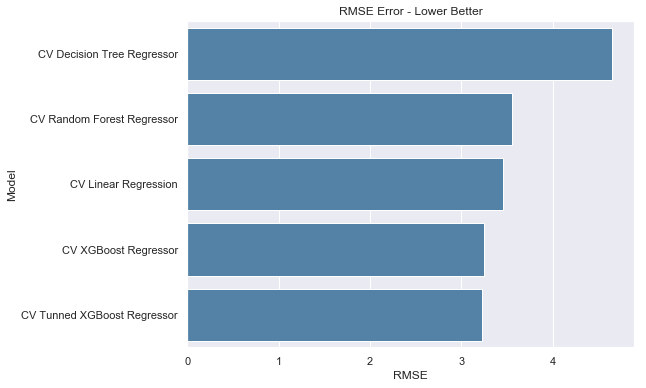

In [69]:
modelos = ["CV Decision Tree Regressor", "CV Random Forest Regressor", "CV Linear Regression",
           "CV XGBoost Regressor", "CV Tunned XGBoost Regressor"]
mses = [decision_rmse_scores.mean(), forest_rmse_scores.mean(), lin_rmse_scores.mean(),
        xgb_rmse_scores.mean(), tunedxgb_rmse_scores]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("RMSE")
ax.set_ylabel("Model")
ax.set_title("RMSE Error - Lower Better")
sns.barplot(y=modelos, x=mses, color="steelblue", ax=ax)


# EDA - Segundo Problema

Inicialmente, vamos dá uma olhada superficial na descrição disponível dos dados. No prórprio site da competição do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) pode-se notar que os dados correspondem a **81 colunas e 1460 linhas**.


## Features (Colunas)

Analisa algumas das **Features** de cada observação e suas respectivas descrições.

- **Id**: ID única para identificar do imóvel - 🆔
- **SalePrice** : Preço de venda  - 🎯
- **MSSubClass**: Classificação do tipo de construção.
- **MSZoning**: Classificação geral de zona.
- **LotFrontage**: Distancia em pés de rua conectada a propriedade.
- **LotArea**: Tamanho da propriedade dem pés quadrados.
- **Street** : Tipo de acesso pela estrada.
- **Alley** : Tipo de acesso por becos.
- **LotShape**: Planicidade de propriedade.
- **LandCountour** : Tipo de acesso pela estrada.
- **Utilities** : Tipo de serviços disponíveis.
- **LotConfig**: Configuração do lote.
- **LandSlope** : Inclinação da propriedade.
- ...

## Limpeza

Agora que temos uma noção geral dos dados, vamos realizar algumas operações para verificar se se há dados faltando, duplicados ou outras inconsistências.

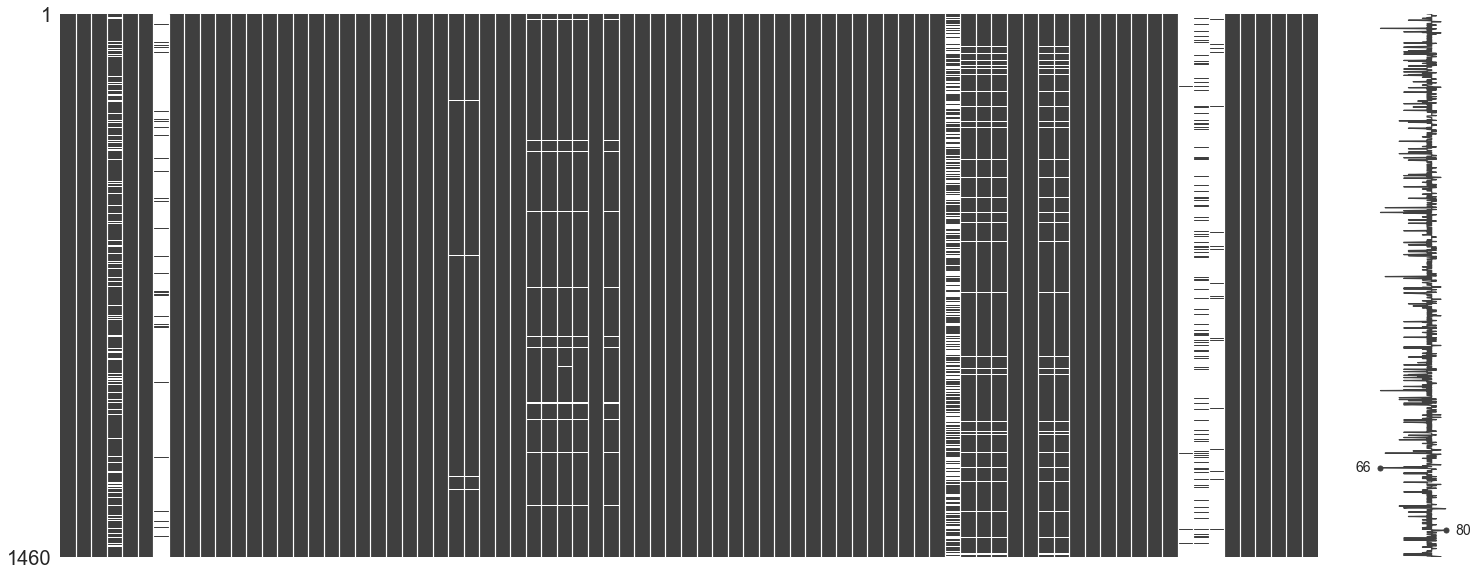

In [10]:
msno.matrix(train)

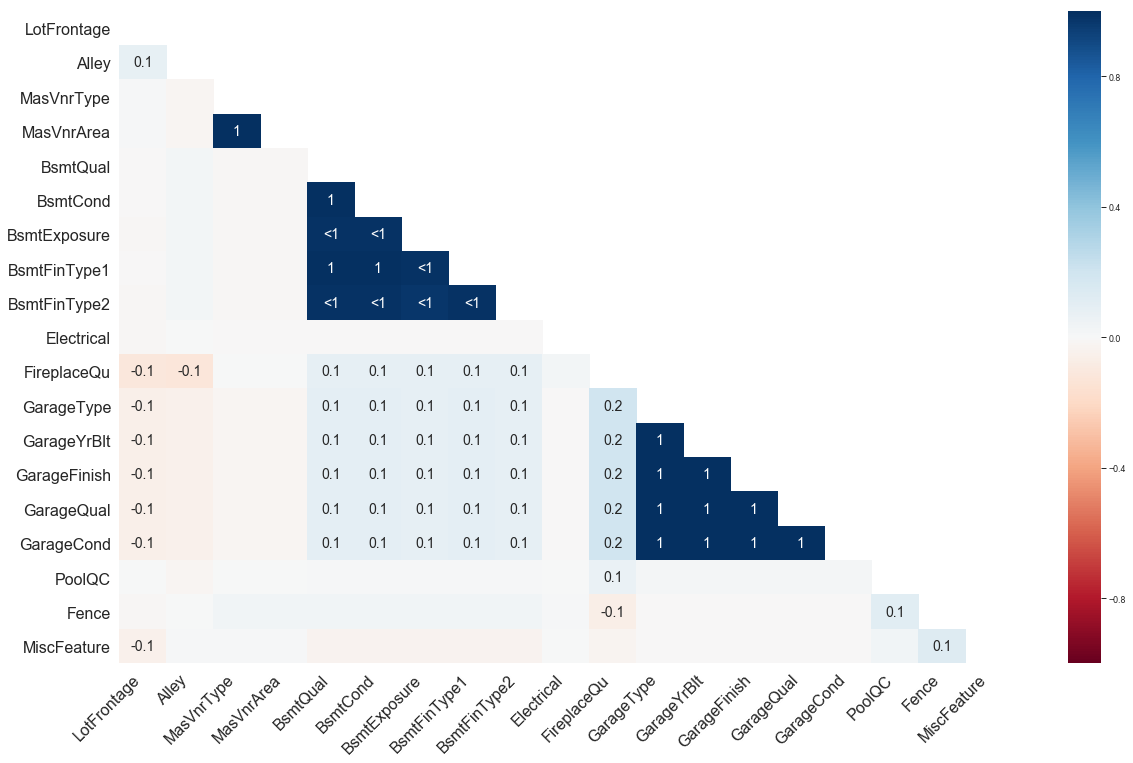

In [12]:
# Shows which missings values occurs simultaneously on both columns
ax = msno.heatmap(train, cmap='RdBu')

## Visualizar os Dados

Agora que só temos dados completos e não duplicados, vamos verificar a consistência dos valores das colunas. Para isso, iremos plotar algumas visualizações.

## Variáveis Numéricas - 34 features

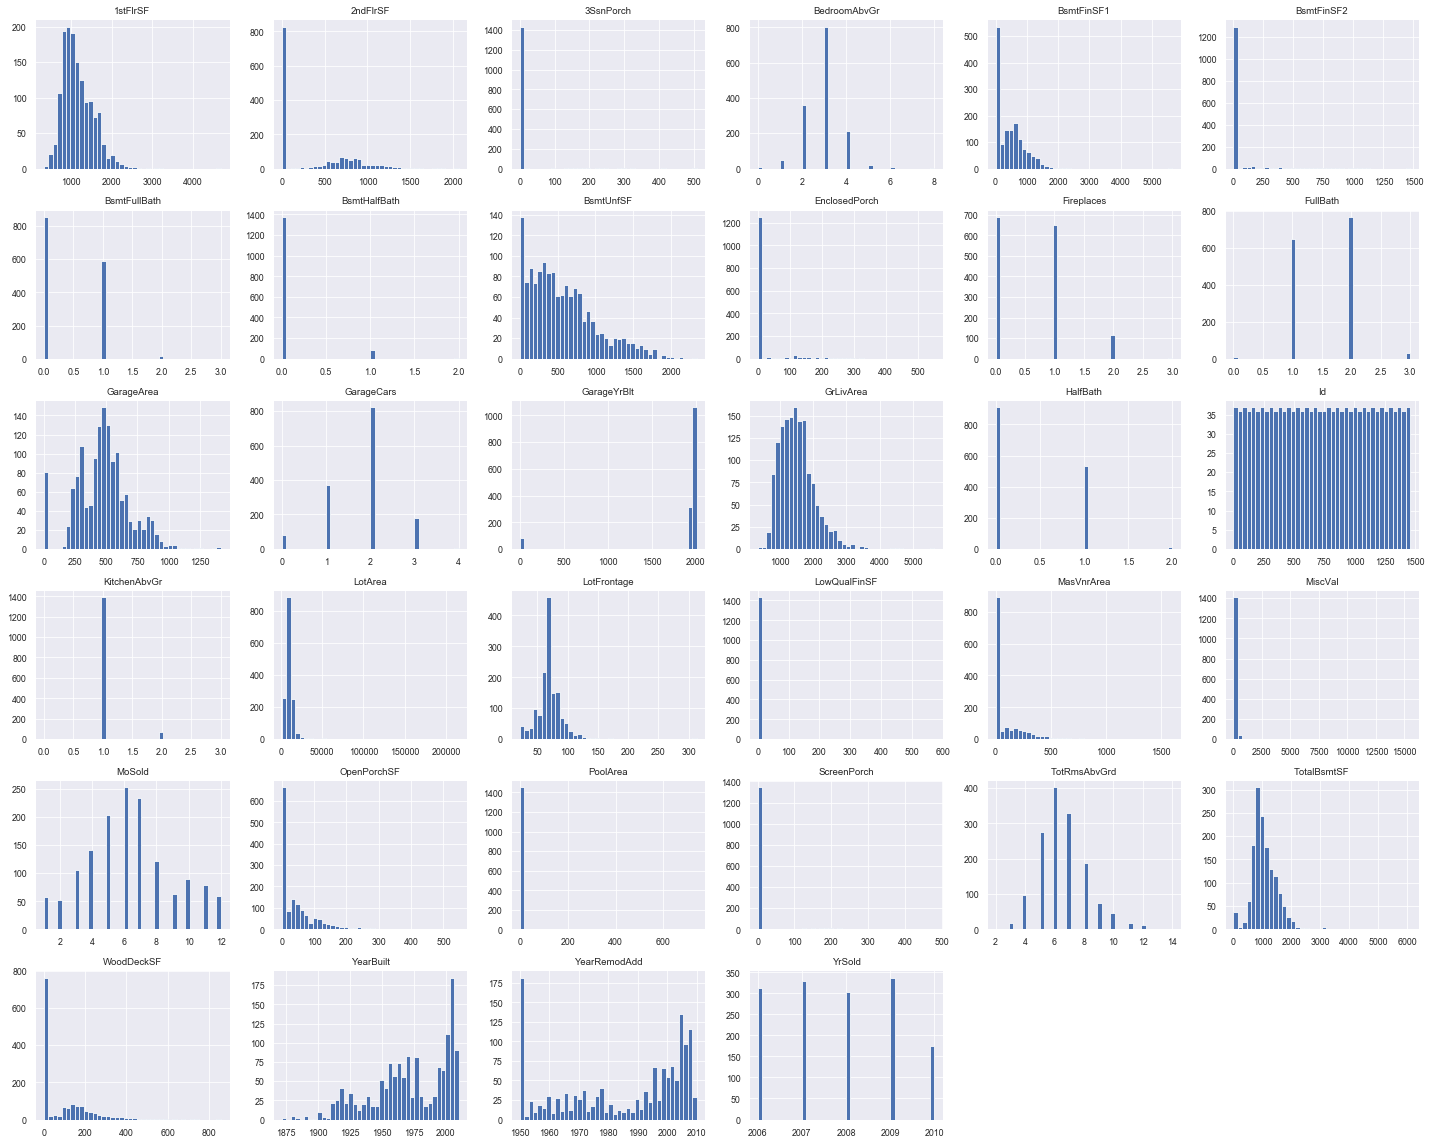

In [39]:
c_train.drop('SalePrice', axis=1).hist(bins=40, figsize=(20, 16))
plt.tight_layout()

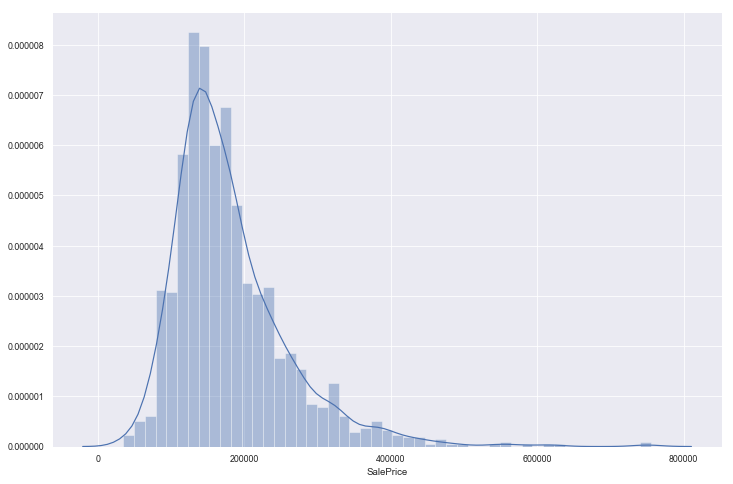

In [38]:
# Look at Target variable
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(c_train.SalePrice, ax=ax)

## Variáveis Categóricas - 46 features

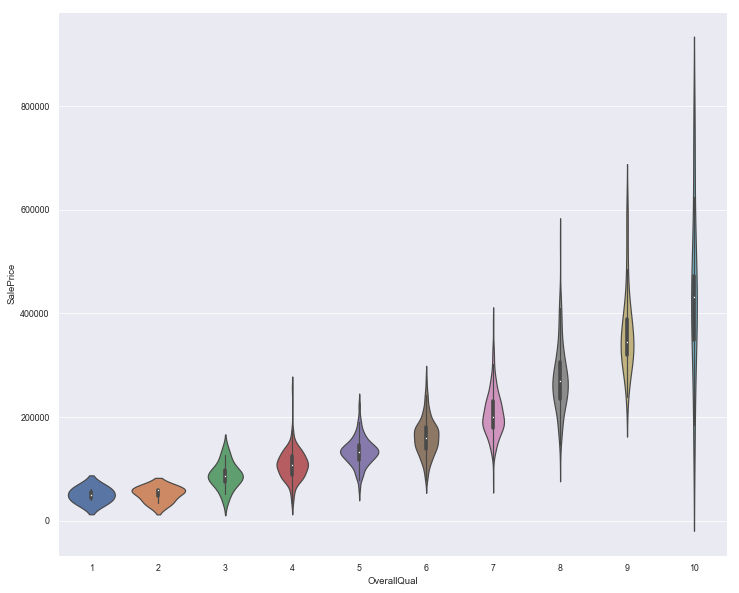

In [40]:
# Some of the main categorical features
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='OverallQual', y='SalePrice', data=c_train, ax=ax)

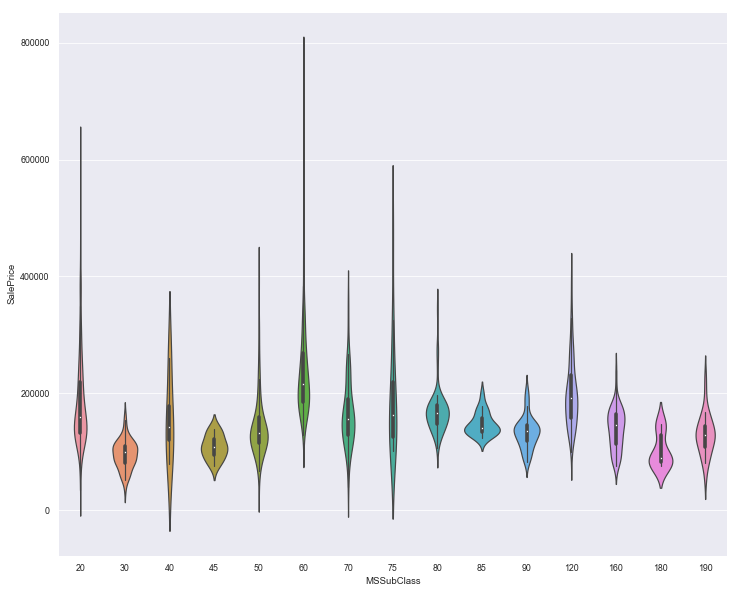

In [21]:
# Some of the main categorical features - Type of building
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='MSSubClass', y='SalePrice', data=c_train, ax=ax)

## Procurar por Correlações

Verificando as correlações das variáveis com a nossa variável alvo, podemos tirar conclusões sobre as variáveis mais **importantes** ou possívelmente **redudantes**.

### Variáveis Numéricas

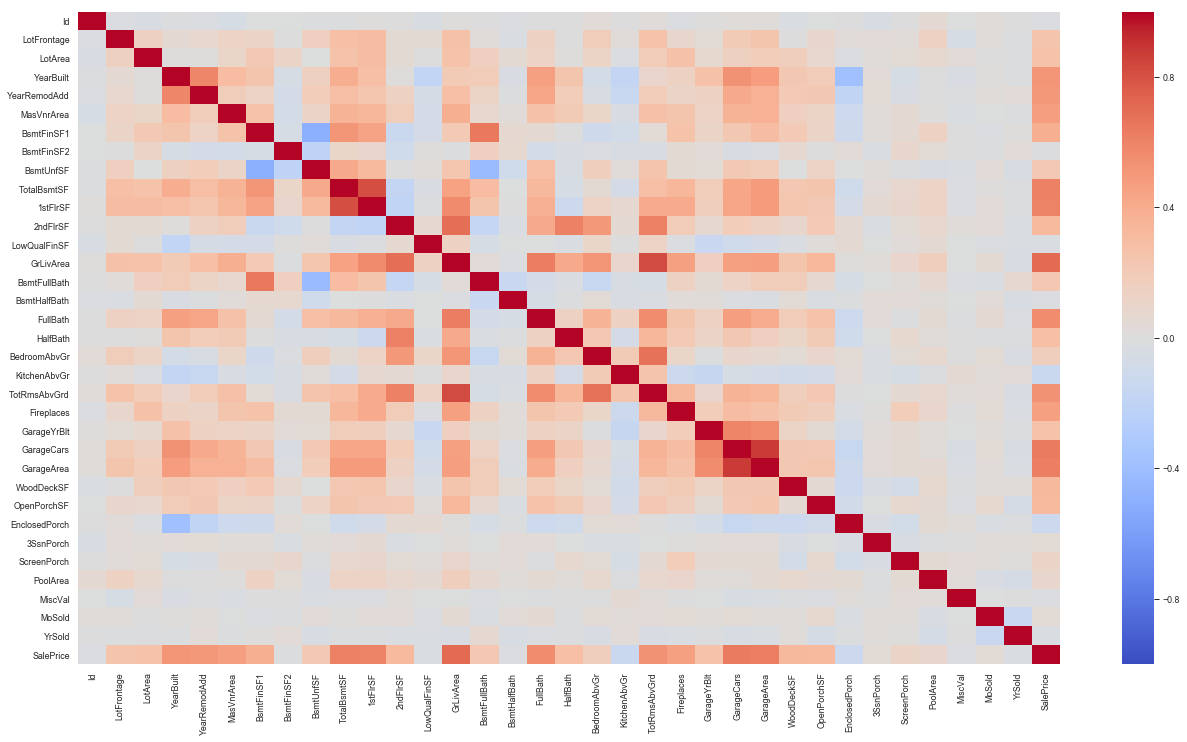

In [24]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(num_corr_matrix, ax=ax, annot=False, cmap='coolwarm', vmin=-1., vmax=1.)

### Variáveis Categóricas
Nese caso, usaremos o [Correlation Ratio](https://en.wikipedia.org/wiki/Correlation_ratio) para criar um valor numérico que indique a influência da categoria no nosso valor numérico.

Text(0.5, 1.0, 'Correlation with Sale Price')

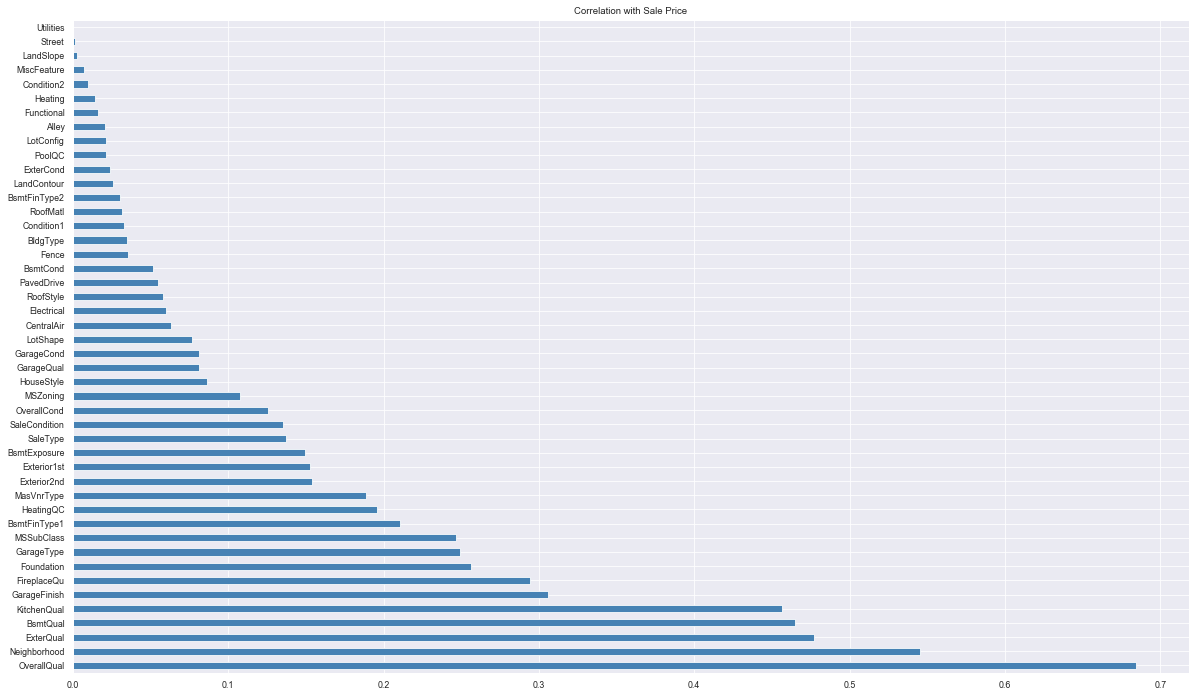

In [26]:
# Categorical feature correlated with numeric target
cat_cols = c_train.select_dtypes('category').columns
cat_corr_target = pd.Series([correlation_ratio(c_train[c], c_train['SalePrice']) for c in cat_cols], index=cat_cols)

cat_corr_target.sort_values(ascending=False).plot.barh(color='steelblue', figsize=(20, 12));
plt.title('Correlation with Sale Price')

Podemos perceber algumas coisas:
- A variável numérica de maior correlação é `GrLivArea`, áre de habitação no térreo.
- A variável categórica de maior correlação é `OverallQual`, qualidade geral dos materiais e acabamento.
- Correlações entre variáveis mostrando redundância, como `GarageCars` e `GarageArea`.
- Variáveis com pouca influência na variável alvo.

Vamos tentar sanar alguns desses problemas no próximo tópico.

## Feature Engineering

Aqui vamos tentar combinar/manipular as colunas para que as informações presentes nelas e a correlação com a variável alvo fiquem o mais claro possível.


### Seleção de Features

Vendo o **heatmap** anterior podemos perceber que algumas features apresentam pouquíssima correlação com as variáveis alvo. Adicionalmente, fica claro que algumas possuem uma correlação muito próxima e acabam sendo informação redudante.

- Remover features com correlação absoluta com a variável alvo menor que **0.1**.
- Remover uma das features com correlação absoluta entre si maior que **0.8**.


### Numéricas: 34 ➡️ 23
### Categóricas: 46 ➡️ 20

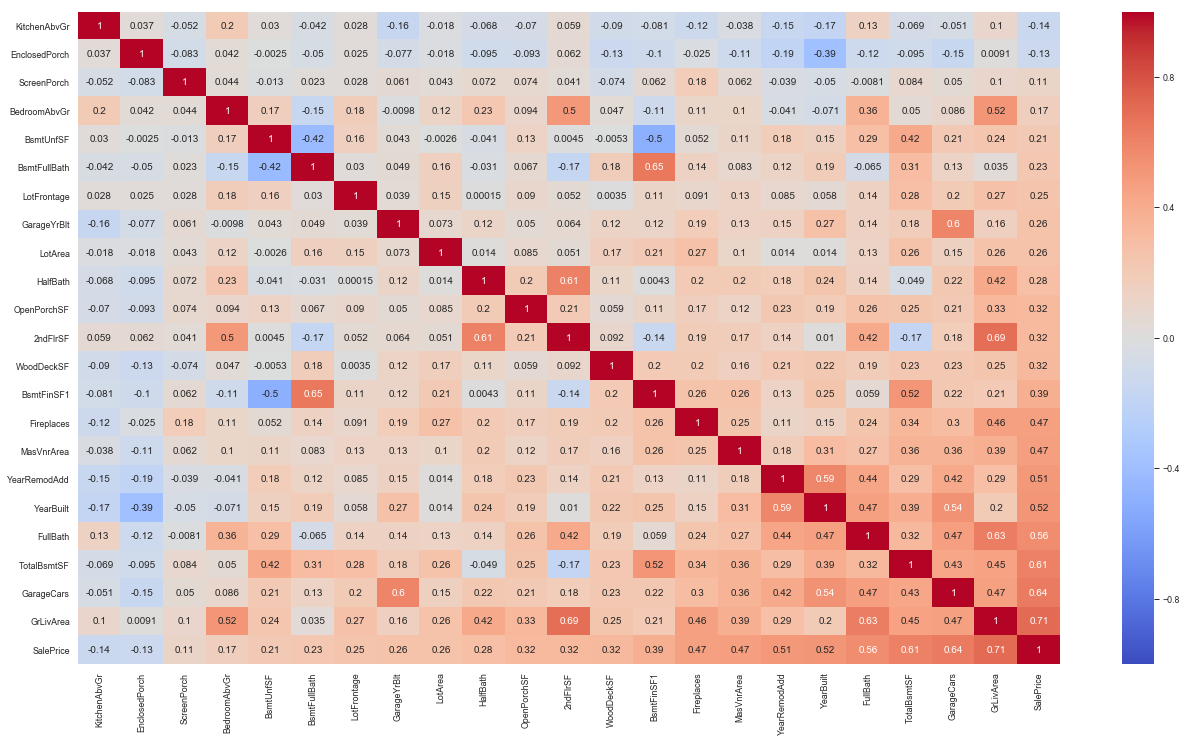

In [33]:
# Check new correlations - 23 features
f_num_corr_matrix = f_train[n_cols].corr()
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(f_num_corr_matrix, ax=ax, annot=True, cmap='coolwarm', vmin=-1., vmax=1.)

Text(0.5, 1.0, 'Correlation with Sale Price')

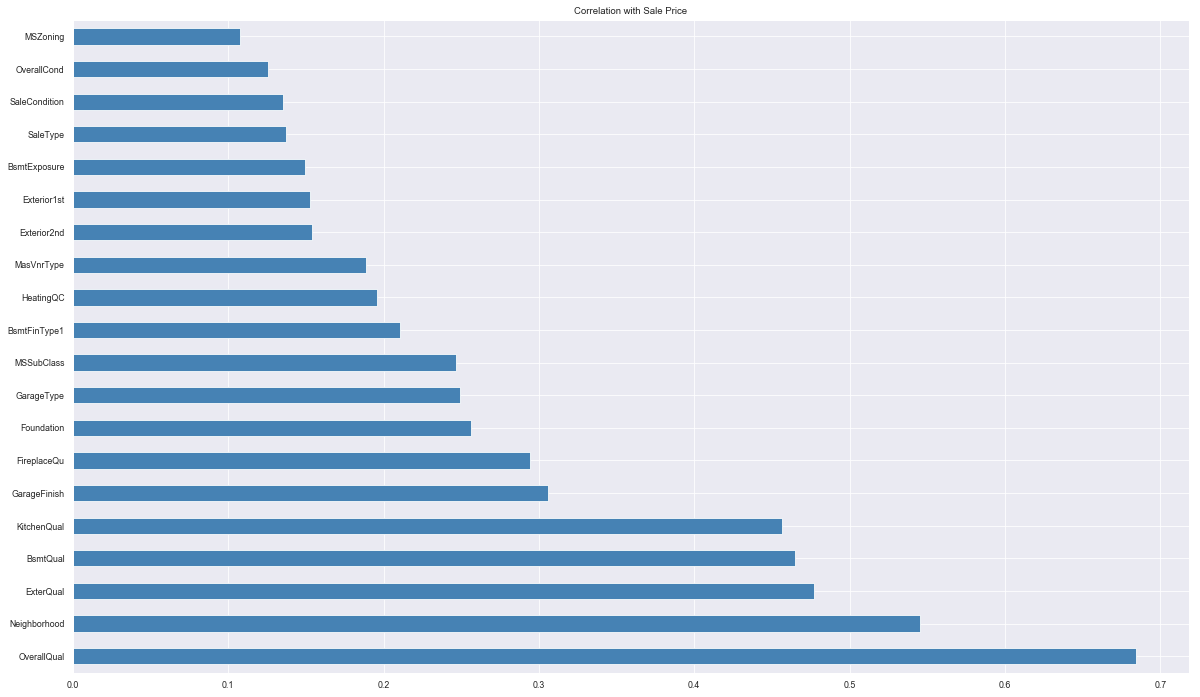

In [42]:
# Filtered results - 20 features
f_cat_corr_target = pd.Series([correlation_ratio(f_train[c], f_train['SalePrice']) for c in c_cols], index=c_cols)

f_cat_corr_target.sort_values(ascending=False).plot.barh(color='steelblue', figsize=(20, 12));
plt.title('Correlation with Sale Price')

In [23]:
# Most correlated feature
IFrame('talk_data/scatter2.html', width='100%', height='620px')

Text(0.5, 1.0, 'Overall Quality x Price')

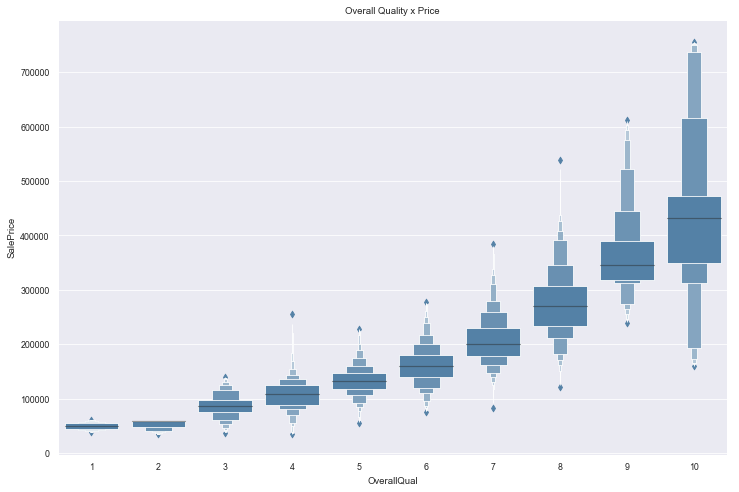

In [44]:
# Generate dynamic boxplot
y = f_train["SalePrice"].copy()
x = f_train["OverallQual"].copy()
# Boxplot of categorical feature
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxenplot(x, y, color='steelblue', ax=ax)
ax.set_title("Overall Quality x Price")

# Machine Learning

## Preparando as Variáveis para os Modelos
Agora, vamos manipular as variáveis para que elas reflitam corretamente o seu significado no modelo.

1. **Removendo Variáveis de Identificação**: Nesse caso, isso já foi feito durante o **Feature Engineering**.
2. **Modificando Variáveis Categóricas**: Todas as variáveis categóricas devem ser mapeadas usando o técnica de *One-hot encoding*.
3. **Preparando Variáveis Cíclicas**: Não há veriáveis cíclicas.
4. **Ajustando a Magnitude das Variáveis Numéricas**: Outra etapa muito importante que tem o propósito de ignorar a intensidade absoluta das variáveis. Assim, dando ênfase as variações relativas.
5. **Separando a Variável Alvo**: Nesse caso, iremos separa a variável `SalePrice` do restante do dataset.
6. **Dividindo o Dataset em Treino/Teste**: Usaremos uma proporção de 80% treino 20% teste.


## Testando Modelos

Com os dados prontos para os modelos, podemos testá-los aplicando vários modelos. Inicialmente, os seguintes modelos foram testados:
- Regressão Linear: Modelo linear simples.
- Árvore de Decisão: Modelo de árvore simples.
- Random Forest: Conjunto de modelo de árvore.
- Boosting Algorithms: Algoritmos amplamente usados, similar ao random forest, mas com regularização.

## Sintonizando Hyper-parâmetros

Vamos testar vários valores de hyper-parametros para encontrarmos o melhor resultado possível do modelo.

## Resultados

Aqui estão os resultados obtidos dos modelos testados.

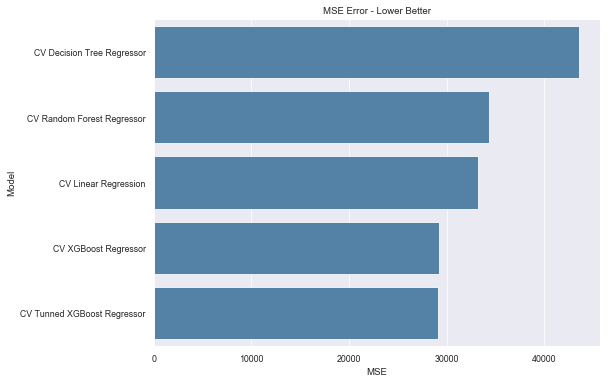

In [126]:
modelos = ["CV Decision Tree Regressor", "CV Random Forest Regressor", "CV Linear Regression",
           "CV XGBoost Regressor", "CV Tunned XGBoost Regressor"]
mses = [decision_rmse_scores.mean(), forest_rmse_scores.mean(), lin_rmse_scores.mean(),
        xgb_rmse_scores.mean(), np.sqrt(-grid_reg.best_score_)]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("MSE")
ax.set_ylabel("Model")
ax.set_title("MSE Error - Lower Better")
sns.barplot(y=modelos, x=mses, color="steelblue", ax=ax)


## Possíveis Melhorias

- Incluir os locais de partida e chegada 🚕
- Utilizar mais dados 🚕
- Continuar procurando melhores hyper-parâmetros 🚕/🏠
- Tentar combinações diferentes de features 🚕/🏠
- Aplicar Deep Learning 🚕/🏠
